# Assignment 3 - Acquiring Data

## Find data set/s related to that question
There are a lot of open data sets out there that you can access. Some places that you can find data sets are listed below, but there are plenty of data sets out there.

1. Kaggle - Lots of interesting data sets  https://www.kaggle.com/datasets
1. UC Irvine Machine Learning Repo - A venerable source of data.  Some what dated now.  http://mlr.cs.umass.edu/ml/
1. US government.  The open data sets from the US government. https://catalog.data.gov/dataset (_Many organinizations/governments make data sets available. I have given three, but check around for others._) 
1. UK data sets https://www.ukdataservice.ac.uk
1. IMF data setshttps://www.imf.org/en/Data
1. Amazon AWS data sets - Data sets that can be aquired through AWS services https://registry.opendata.aws
1. Wikipedia list of data sets - https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research
1. 538 - Politics and sports opinions https://fivethirtyeight.com
1. Awesome data - a collection of data sets on github https://github.com/awesomedata/awesome-public-datasets

One final option is to scrape data from existing web sites and build your own data set.

# Part 3 - Read the CSV into a DataFrame

Now that we have a CSV file to work with, lets use pandas to examine the data.

The first thing we will do is to pull all the data from the CSV file into a pandas dataframe and then look at the keys and the first five lines using the head() function.

In [1]:
import pandas as pd
data = pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Part 4 - Quick Overview
Lets get a quick overview of the data using the info() function.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## _Notes_
all non null so they must have data in them 

## Part 5 - Look at the object fields
We can pull out information about the Gender field using the value_counts() method

In [6]:
print(data['education'].value_counts())
print(data["sex"].value_counts())
data["race"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Male      21790
Female    10771
Name: sex, dtype: int64


White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

## _Notes_
gonna need to use stratified samples for these features

## Part 6 - Look at the numerical fields
We can look at numerical fields using the describe() function. We get some basic information.

In [7]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## _Notes_


## Part 7 - Get Distributions
To really understand what is going on in the data, we will need to see a distribution. One of the common ways of doing this is to use a histogram. 

[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000155A75ED3C8>


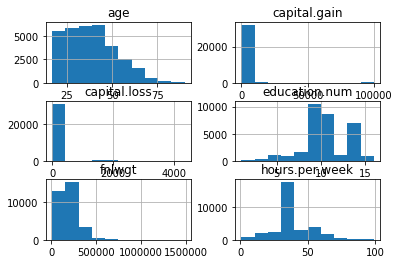

In [9]:
import matplotlib.pyplot as plt
print(data.hist(bins=10))
plt.show()

## _Notes_
  

## Part 8 Visualize the data
Lets make a copy of the data set and do some simple graphs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000155A5CE7B38>,
      dtype=object)

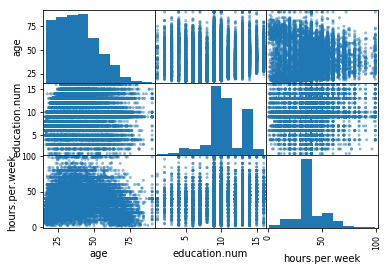

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["age", "education.num", "hours.per.week"]
scatter_matrix(data[attributes])

## _Notes_  

high correlation between open and close?


## Part 9 - Do Correlation

Check the numerical parameters and see if any are strongly correlated.  This can give an idea of dimensions that are predictive of each other.

In [14]:
corr = data.corr()
print(corr)

                     age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education.num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital.gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital.loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours.per.week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours.per.week  
age                   0.068756  
fnlwgt               -0.018768  
education.num         0.148123  
capital.gain          0.078409  
capital.loss          0.054256  
hours.per.week        1.000000  


## _Notes_
i have some high correlations


## Part 10 - A better scatter plot
Look to see if there are interesting relations to the non-numeric data.  Try some filtering.

going to try to compare the instances where the stock lowered that day and where the stock went up that day. gonna use the change attribute.

In [19]:
import matplotlib.pyplot as plt
import numpy as np

#young = np.ma.masked_where(data["age"]>30  , data["age"])
#old = np.ma.masked_where(data["age"] <= 30 , data["age"])

#plt.scatter(x = data["hours.per.week"],y = young,marker = "v" )
#plt.scatter(x =data["hours.per.week"] , y =old, marker = "^" )

#rich = np.ma.masked_where(data["income"] == "<=50k", data["income"])
#poor = np.ma.masked_where(data["income"] == ">=50k", data["income"])

#plt.scatter(x = data["hours.per.week"],y = rich,marker = "v" )
#plt.scatter(x = data["hours.per.week"],y = poor,marker = "v" )
import pyspark as py
plt.show()

ModuleNotFoundError: No module named 'pyspark'

## _Notes_
still cannot figure this error out.
needed to add["change"] to data
also made a scatter for each mask

# Bonus
Do an acquisition and preliminary analysis on a second data set.  Compare the data sets.


to compare datasets i would say that the apple dataset is overall better for understanding how this works.

The first dataset was about something i really dont understand and it had lots of columns that i did not really know what to do with. 

With the apple dataset i have a general idea of the types of data and their meanings. 

other things i noticed. Date and label are the same thing. i dont know what vwap is. just looked it up. its volume weighted average price.

if i am right i think there is a high correlation between open high low and others. I think this is because when a stock opens in a day the price should not go to far away from the opening price. Not sure what i can do with this data.